# Using best value year and quality, look at correlation of high quality pixels

In [2]:
import rioxarray as rxr
import xarray as xr
import numpy as np
#import xrspatial as xrs
import geopandas as gpd
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# from dask.distributed import LocalCluster
# cluster = LocalCluster(n_workers = 10, threads_per_worker = 10, memory_limit = 0) # Refined through testing
# client = cluster.get_client()
# client # Can open in other window by clicking 'Dashboard' link below

## WinterYear Snow End

In [5]:
wy2223 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2223\HLS_Fmask_snow_end_winterYear2223_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze() #.load()
#wy2223 = xrs.focal.mean(wy2223.squeeze()) # 3x3 Focal mean
wy2223

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(145, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        3851316.0
    STATISTICS_COVARIANCES:  67.66659533117556
    STATISTICS_MAXIMUM:      193
    STATISTICS_MEAN:         149.69989530852
    STATISTICS_MEDIAN:       151.788235
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       8.2259707835109
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

In [6]:
wy2122 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2122\HLS_Fmask_snow_end_winterYear2122_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze() #.load()
#wy2122 = xrs.focal.mean(wy2122.squeeze()) # 3x3 Focal mean
wy2122

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(145, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        3851316.0
    STATISTICS_COVARIANCES:  60.28285269651168
    STATISTICS_MAXIMUM:      176
    STATISTICS_MEAN:         148.48733082405
    STATISTICS_MEDIAN:       148.894118
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       7.7642032879434
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

In [7]:
wy2021 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2021\HLS_Fmask_snow_end_winterYear2021_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze() #.load()
#wy2021 = xrs.focal.mean(wy2021.squeeze()) # 3x3 Focal mean
wy2021

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(145, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        3851308.0
    STATISTICS_COVARIANCES:  93.93109086643169
    STATISTICS_MAXIMUM:      202
    STATISTICS_MEAN:         151.28568190339
    STATISTICS_MEDIAN:       153.603922
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       9.6918053460865
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

In [8]:
wy1920 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\1920\HLS_Fmask_snow_end_winterYear1920_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze() #.load()
#wy1920 = xrs.focal.mean(wy1920.squeeze()) # 3x3 Focal mean
wy1920

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(145, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        3851316.0
    STATISTICS_COVARIANCES:  30.19753739851602
    STATISTICS_MAXIMUM:      186
    STATISTICS_MEAN:         146.26984672252
    STATISTICS_MEDIAN:       147.894118
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       5.4952286029351
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

In [9]:
wy1819 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\1819\HLS_Fmask_snow_end_winterYear1819_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze() #.load()
wy1819

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(145, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        3851129.0
    STATISTICS_COVARIANCES:  52.44020851494274
    STATISTICS_MAXIMUM:      194
    STATISTICS_MEAN:         137.19318958154
    STATISTICS_MEDIAN:       137.137255
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       7.2415611932057
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

## Interannual Best Value Data

In [10]:
bv1823 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\interannual\HLS_Fmask_snow_end_bv_1823_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze() #.load()
bv1823

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(145, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_SOFTWARE:        GDAL 3.7.0e (3070046) (4.5.1;1700;3.0.0;2.0.7;;;...
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  48.68996068324251
    STATISTICS_MAXIMUM:      178
    STATISTICS_MEAN:         147.22277631855
    STATISTICS_MINIMUM:      94
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       6.9778191925015
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end_bv

In [11]:
bvq1823 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\interannual\HLS_Fmask_snow_end_bvq_1823_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze() #.load()
bvq1823

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(145, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_SOFTWARE:        GDAL 3.7.0e (3070046) (4.5.1;1700;3.0.0;2.0.7;;;...
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  0.0007292251785021484
    STATISTICS_MAXIMUM:      1
    STATISTICS_MEAN:         0.95685655989028
    STATISTICS_MINIMUM:      0.62271040678024
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0.027004169650299
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end_bvq

In [12]:
bvy1823 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\interannual\HLS_Fmask_snow_end_bvy_1823_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze() #.load()
bvy1823

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(145, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      snow_end_bvy

## Subfishnet (10 x 10 km)

In [13]:
# #tile_list = [828, 829, 830, 904, 905, 906, 988, 989, 990] # For 3x3 test area only

# fishnet = gpd.read_file(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\AA\Regional Snow Dynamics\canadaFishnet_60km_sub10km_HBLclip.shp")
# #fishnet = fishnet[fishnet['ID'].isin(tile_list)] # HBL3x3
# fishnet

## Look at best value (& 0.9+ quality) correlations

In [51]:
year = 2023 # Second year of winter year
match = wy1819

In [52]:
%%time
base = xr.where((bvy1823 == year), bv1823, np.nan)
match = xr.where((bvy1823 == year), match, np.nan) 

print('From xarray: ' + str(xr.corr(base, match, dim = ['x', 'y']).load().item()))# + ', n = ' + str(base.notnull().sum().load().item()))

From xarray: 0.7562441825866699
CPU times: total: 125 ms
Wall time: 555 ms


In [53]:
# %%time
# base = xr.where((bvy1823 == year) & (bvq1823 >= 0.9), bv1823, np.nan) # 
# match = xr.where((bvy1823 == year) & (bvq1823 >= 0.9), match, np.nan) # 

# print('From xarray: ' + str(xr.corr(base, match, dim = ['x', 'y']).load().item()))# + ', n = ' + str(base.notnull().sum().load().item()))

In [54]:
%%time
# If null in either arr, set to null in both
base = xr.where((base.isnull() | match.isnull()), np.nan, base)
match = xr.where((base.isnull() | match.isnull()), np.nan, match)

# Flatten
base = base.to_numpy().flatten()
match = match.to_numpy().flatten()

# Drop null
base = base[~np.isnan(base)]
match = match[~np.isnan(match)]

print('From scipy:' + str(pearsonr(base, match)[0]) + ', pval: ' + str(pearsonr(base, match)[1]) + ', n = ' + str(len(base)))

From scipy:0.7562442, pval: 0.0, n = 490749
CPU times: total: 188 ms
Wall time: 784 ms


In [23]:
heatmap, xedges, yedges = np.histogram2d(x = base, y = match, bins = 100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

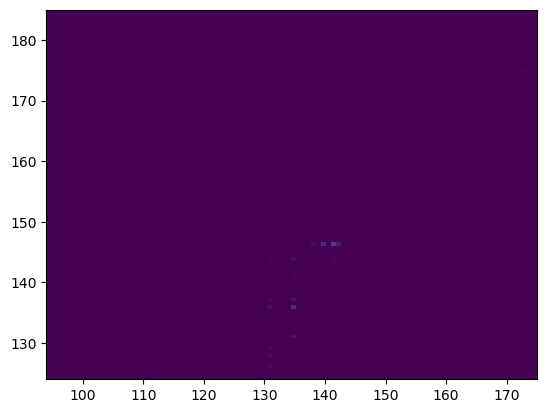

In [26]:
plt.imshow(heatmap.T, extent = extent, origin='lower', vmin = 0, vmax = 10000)
plt.show()

## Testing

In [60]:
#np.unique(xr.where(bvy1823 == 2023, wy2223, np.nan) - xr.where(bvy1823 == 2023, bv1823, np.nan), return_counts = True)

In [61]:
#xr.where(bvy1823 == 2023, wy2223, np.nan)#.plot()

In [62]:
#xr.where(bvy1823 == 2023, bv1823, np.nan)#.plot()

In [56]:
#xr.where(bvy1823 == 2023, np.nan, bv1823).plot()

In [63]:
#(xr.where(bvy1823 == 2023, np.nan, bv1823) - xr.where(bvy1823 == 2023, np.nan, wy2223)).rio.to_raster('test.tif')

In [57]:
import numpy as np

# HBL
r = [0.79, 0.73, 0.78, 0.70, 0.80, 0.70, 0.80, 0.65, 0.77, 0.77, 0.75, 0.59, 0.71, 0.59, 0.62, 0.68, 0.84, 0.66, 0.35, 0.79]
ss = [72, 72, 72, 72, 41, 41, 41, 41, 39, 39, 39, 39, 152, 152, 152, 152, 133, 133, 133, 133]

print(np.average(r))
print(np.average(r, weights = ss))

0.7035
0.6839759725400457


In [58]:
# Northern Alaska Site
r = [0.88, 0.79, 0.84, 0.71, 0.79, 0.77, 0.70, 0.67, 0.82, 0.75, 0.78, 0.82, 0.88, 0.86, 0.87, 0.85, 0.76, 0.77, 0.70, 0.75]
ss = [0.1, 0.1, 0.1, 0.1, 2.2, 2.2, 2.2, 2.2, 0.8, 0.8, 0.8, 0.8, 0.3, 0.3, 0.3, 0.3, 0.5, 0.5, 0.5, 0.5]

print(np.average(r))
print(np.average(r, weights = ss))

0.788
0.7584615384615385
